In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import multivariate_normal as mvn

import vsem
from vsem_inv_prob import InvProb, VSEMLikelihood

import sys
sys.path.append("./../linear_Gaussian/")
from Gaussian import Gaussian

rng = np.random.default_rng(6435)


# Exact Inverse Problem

In [4]:
n_days = 365 * 2
par_names = ["KEXT", "Av"]

likelihood = VSEMLikelihood(rng, n_days, par_names)
prior = vsem.DefaultVSEMPrior(likelihood.par_names, rng)
inv_prob = InvProb(rng, prior, likelihood)

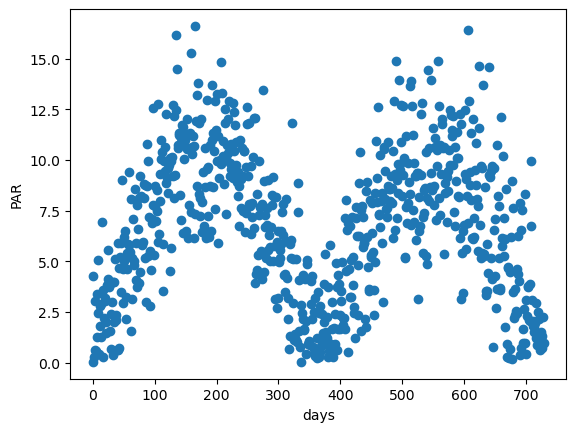

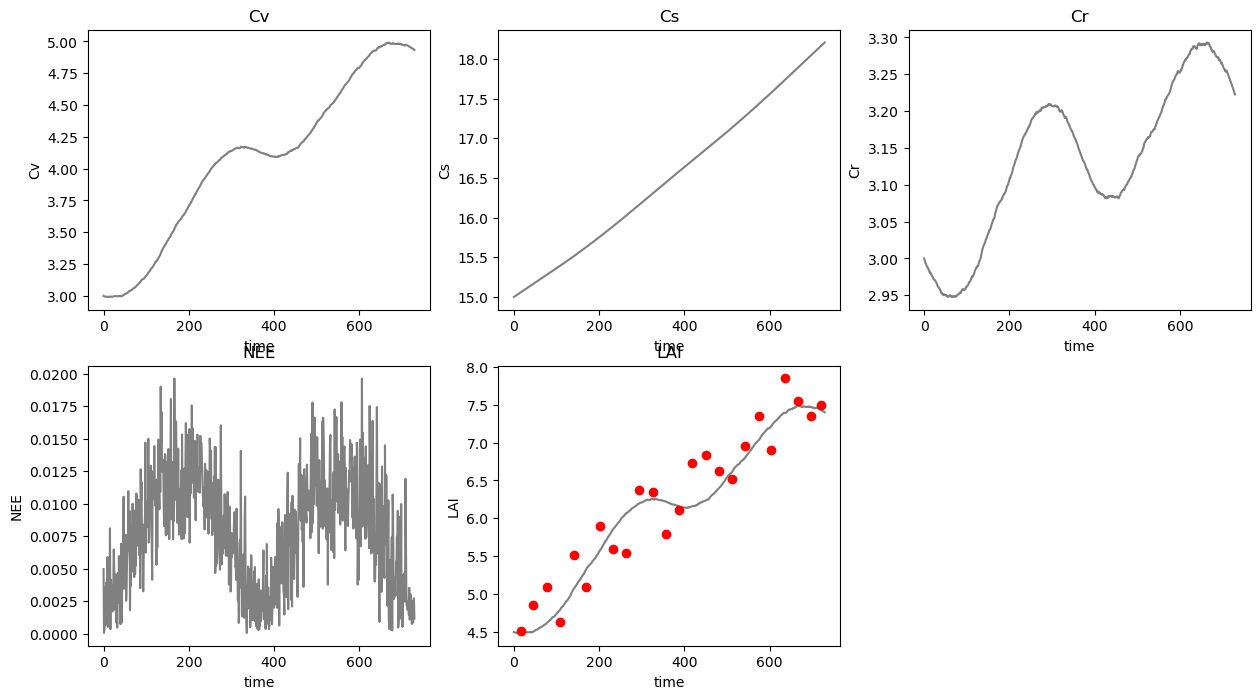

In [6]:
likelihood.plot_driver()
likelihood.plot_ground_truth()

In [ ]:
u1_supp = prior.dists[par_names[0]].support()
u2_supp = prior.dists[par_names[1]].support()
u1_grid = np.linspace(u1_supp[0], u1_supp[1], 100)
u2_grid = np.linspace(u2_supp[0], u2_supp[1], 100)
U1_grid, U2_grid = np.meshgrid(u1_grid, u2_grid)

log_post_pdf = lambda u1, u2: inv_prob.log_posterior_density(np.array([u1, u2])
log_post_grid = np.vectorize(log_post_pdf)(U1_grid, U2_grid)

In [16]:
U1_grid.shape

(100, 100)

In [13]:
prior.dists["KEXT"].support()

(np.float64(0.2), np.float64(1.0))

/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem.py:39: RuntimeWarning: overflow encountered in exp
  return (1-gamma) * lue * PAR * (1 - np.exp(-k * compute_lai(xv, lar)))
/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem.py:63: RuntimeWarning: invalid value encountered in scalar subtract
  dxv_dt = av*npp - xv/tauv
/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem.py:65: RuntimeWarning: invalid value encountered in scalar subtract
  dxr_dt = (1-av)*npp - xr/taur
/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem.py:64: RuntimeWarning: invalid value encountered in scalar add
  dxs_dt = xr/taur + xv/tauv - xs/taus
/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/../linear_Gaussian/Gaussian.py:181: RuntimeWarning: overflow encountered in multiply
  quad_term = np.sum(z * z, axis=0)
/Users/andrewroberts/Desktop/git-repos/bip-surrogate

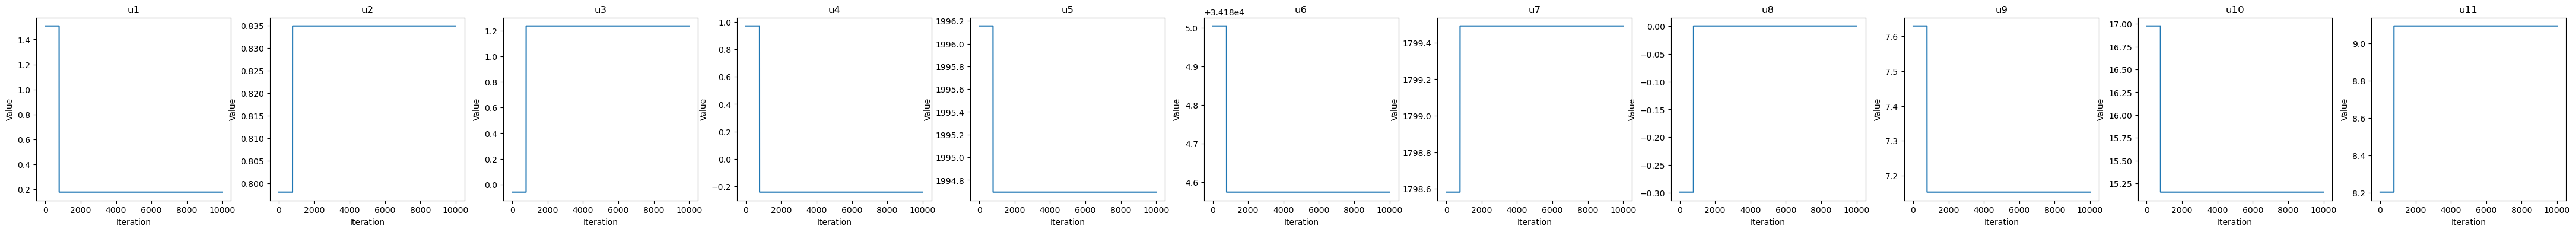

In [7]:
samp, trace_plot = inv_prob.sample_posterior(n_samp=10000)

display(trace_plot)